<a href="https://colab.research.google.com/github/Abhiraj36/HumanEmotionsDetection/blob/main/Human_Emotion_Dataset_Prediction_Using_Tensorfow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
muhammadhananasghar_human_emotions_datasethes_path = kagglehub.dataset_download('muhammadhananasghar/human-emotions-datasethes')

print('Data source import complete.')

Data source import complete.


In [3]:
import os

base_path = muhammadhananasghar_human_emotions_datasethes_path
for root, dirs, files in os.walk(base_path):
    print(root)
    break

/kaggle/input/human-emotions-datasethes


In [4]:
import os

base_path = "/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4"
for item in os.listdir(base_path):
    print(item)


EmotionsDataset_Splitted
Emotions Dataset
EmotionsDataset


In [5]:
nested_path = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset")
print("Contents of nested folder:")
print(os.listdir(nested_path))


Contents of nested folder:
['test', 'train']


In [6]:
subdirs = ["Emotions Dataset", "EmotionsDataset", "EmotionDataset_Splitted"]
base_path = "/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4"



# Data Loading

In [7]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Permute, Dense, Flatten, Conv2D, Resizing, Rescaling, Input, Dropout, InputLayer, MaxPool2D, BatchNormalization, RandomContrast, RandomFlip, RandomRotation, MaxPooling2D, Activation, GlobalAveragePooling2D, Add, Embedding, LayerNormalization, MultiHeadAttention
from tensorflow.keras.regularizers import L2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

In [8]:
train_directory = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset", "train")
val_directory = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset", "test")

CLASS_NAMES=['angry','happy','sad']

In [9]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
}

In [10]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 6799 files belonging to 3 classes.


In [11]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 2278 files belonging to 3 classes.


In [12]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
#     "N_EPOCHS": 20,
    "N_EPOCHS": 5,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

In [13]:
train = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 6799 files belonging to 3 classes.


In [14]:
val = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 2278 files belonging to 3 classes.


In [15]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 6799 files belonging to 3 classes.


In [16]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)

Found 2278 files belonging to 3 classes.


# Data Visualization

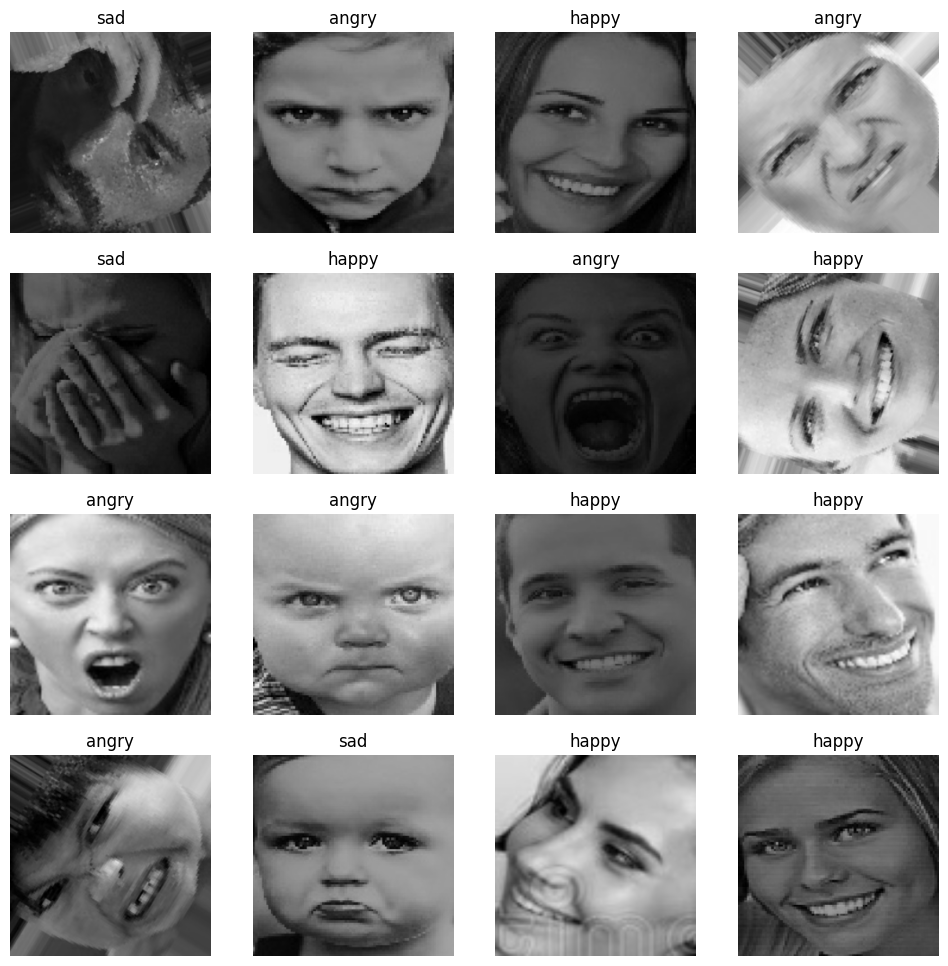

In [17]:
plt.figure(figsize=(12,12))
for images,labels in train_dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i]/255)
        plt.title(CLASS_NAMES[tf.argmax(labels[i],axis=0)])
        plt.axis('off')

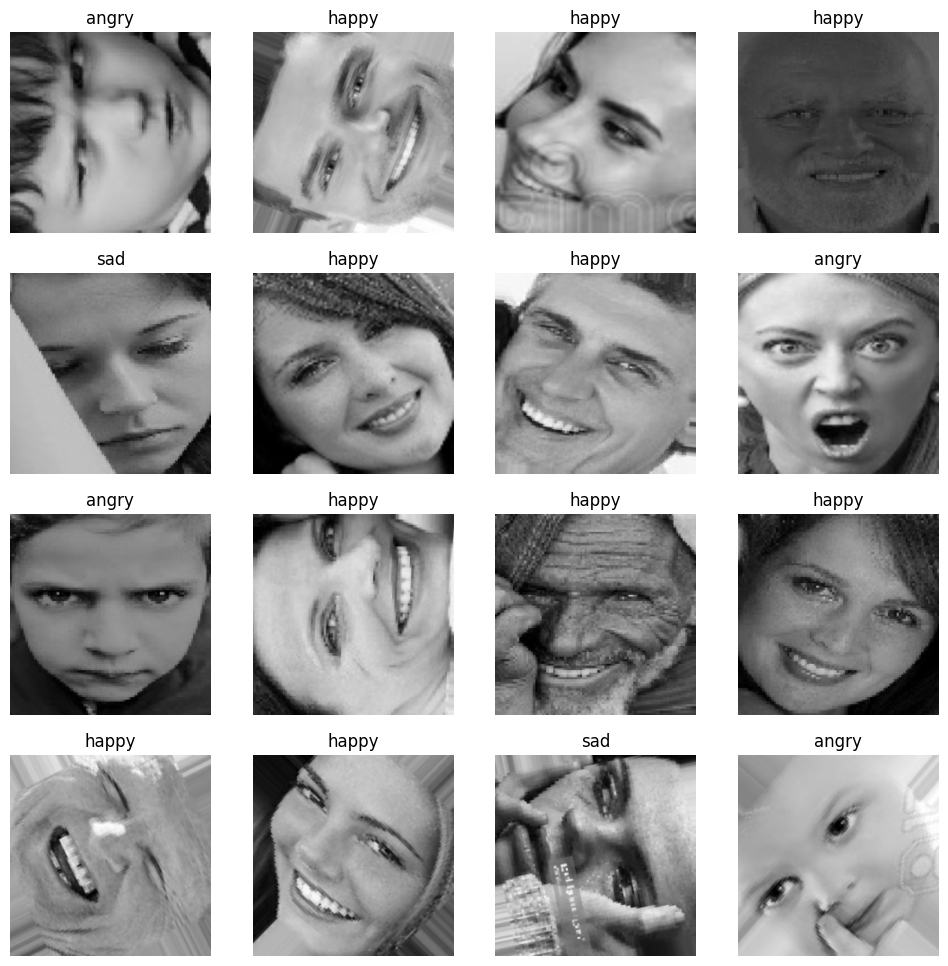

In [18]:
plt. figure(figsize = (12,12))
for images, labels in train_dataset. take (1) :
    for i in range (16):
        ax = plt.subplot(4,4, i+1)
        plt. imshow(images [i]/255)
        plt. title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy ()])
        plt.axis ("off")

# Data Preparation

In [19]:
training_dataset = (
        train_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [20]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [21]:
validation_dataset = (
        val_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [22]:
validation_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [23]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
            Rescaling(1./255)
])

# Modelling

In [24]:
lenet_model = tf.keras.Sequential(
    [
#     InputLayer(input_shape = (None, None, 3), ),

#     resize_rescale_layers,
    InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
    Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

# Training

In [25]:
loss_function=tf.keras.losses.CategoricalCrossentropy()
#loss_function = SparseCategoricalCrossentropy ()

In [26]:
# y_true = [[0, 1, 0], [0, 9, 1]]
# y_pred = [[0.01,0.05,0.96], [0.1, 0.2, 0.7]]
# # Using 'auto'T'sum_over_batch_size' reduction type.
# cce = tf. keras. losses.CategoricalCrossentropy()
# print (cce(y_true, y_pred). numpy ())

In [27]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [28]:
#lenet_model.compile(
#                    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
#                    loss=loss_function,
#                    metrics=metrics
#                                    )

In [29]:
#history= lenet_model.fit(
#    training_dataset,
#    validation_data=val_dataset,
#    epochs=CONFIGURATION['N_EPOCHS'],
#    verbose=1)

In [30]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model_loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train_loss','val_loss'])
# plt.show()

In [31]:
# plt. plot (history. history['accuracy'])
# plt. plot(history.history[ 'val_accuracy'])
# plt. title( 'Model accuracy')
# plt. ylabel( 'accuracy')
# plt. xlabel( 'epoch')
# plt. legend(['train_accuracy', 'val_accuracy'])
# plt. show()

# Evalution

In [32]:
#lenet_model. evaluate(validation_dataset)

# Testing

In [33]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [34]:
import cv2
import tensorflow as tf

image_path = '/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg'
test_image = cv2.imread(image_path)

# Step 1: Check if image was loaded correctly
if test_image is None:
    print("Failed to load image. Please check the path.")
else:
    # Step 2: Resize to model input size
    test_image = cv2.resize(test_image, (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]))

    # Step 3: Convert BGR (OpenCV format) to RGB
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Step 4: Normalize and expand dimensions
    im = tf.constant(test_image, dtype=tf.float32) / 255.0
    im = tf.expand_dims(im, axis=0)  # Make it (1, height, width, 3)

    # Step 5: Predict
    prediction = lenet_model(im)
    predicted_class = tf.argmax(prediction, axis=-1).numpy()[0]
    print(f"Predicted Emotion: {CLASS_NAMES[predicted_class]}")


Predicted Emotion: happy


In [35]:
# pred=lenet_model.predict(im)
# print(CONFIGURATION['CLASS_NAMES'][tf.argmax(pred,axis=-1)[0]])

In [36]:
# test_image = cv2. imread("/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg")
# im = tf. constant(test_image, dtype = tf. float32)
 #im = tf. expand_dims (im, axis = 0)
#print(CLASS_NAMES[tf.argmax(lenet_model(im), axis = -1).numpy() [0]])

In [37]:
CLASS_NAMES=['angry','happy','sad']
test_image = cv2.imread('/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

im = tf.constant(test_image, dtype=tf.float32)
im = tf.expand_dims(im, axis=0)

predicted_class_index = tf.argmax(lenet_model(im), axis=-1).numpy()[0]
predicted_class_name = CLASS_NAMES[predicted_class_index]
print(predicted_class_name)


happy


In [38]:
# plt.figure(figsize = (12,12))

# for images, labels in validation_dataset.take(1):
#   for i in range(16):
#     ax = plt.subplot(4,4, i+1)
#     plt.imshow(images[i]/255.)

#     plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = -1).numpy()]
#               + "\n" + "Predicted Label - : "
#               + CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
#     plt.axis("off")

happy


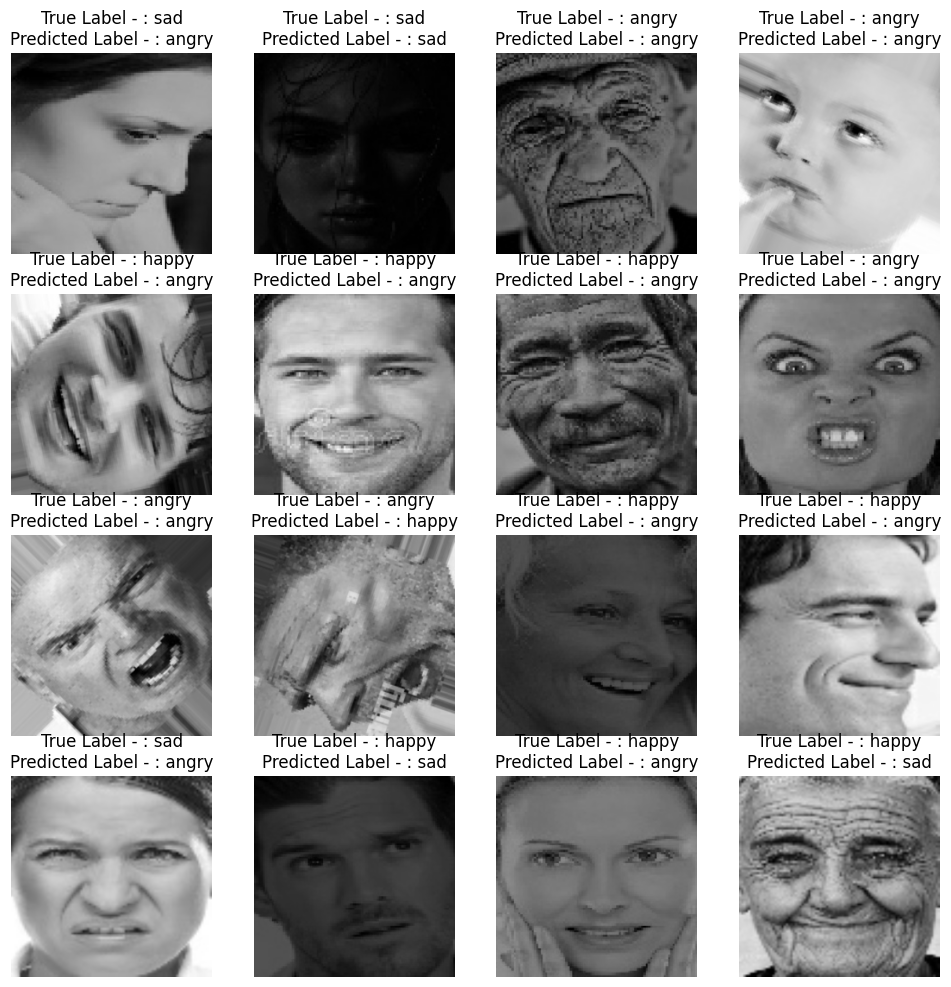

In [39]:
import cv2
import matplotlib.pyplot as plt

test_image = cv2.imread('/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

im = tf.constant(test_image, dtype=tf.float32)
im = tf.expand_dims(im, axis=0)
print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")


# Confusion Matrix

In [40]:
predicted = []
labels = []
for im, label in validation_dataset:
    predicted. append (lenet_model (im))
    labels. append (label.numpy())

In [41]:
#print(labels)

In [42]:
#print(np.argmax(labels))

In [43]:
print(np.argmax(labels[:2], axis = -1))

[[1 1 1 2 1 1 2 0 2 0 1 1 2 1 2 1 2 2 2 2 2 2 0 1 2 2 2 2 1 1 1 2]
 [1 1 1 1 0 1 1 1 1 2 1 2 1 1 2 0 2 1 0 2 2 2 0 1 2 0 1 2 0 2 2 1]]


In [44]:
print(np.argmax(labels[:2], axis = -1).flatten())

[1 1 1 2 1 1 2 0 2 0 1 1 2 1 2 1 2 2 2 2 2 2 0 1 2 2 2 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 2 1 2 1 1 2 0 2 1 0 2 2 2 0 1 2 0 1 2 0 2 2 1]


In [45]:
print(np.argmax(labels[:-1], axis = -1). flatten())
print(np.argmax(predicted[: -1], axis = -1). flatten ())

[1 1 1 ... 2 1 0]
[0 0 0 ... 0 0 0]


In [46]:
pred = np.argmax(predicted[:-1], axis = -1). flatten ()
lab = np. argmax(labels [: -1], axis = -1).flatten ()

In [47]:
predicted = []
labels = []
for im, label in validation_dataset:
    predicted. append (lenet_model (im))
    labels. append(label. numpy())

In [48]:
 #print (np. concatenate([np.argmax(labels[: -1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1). flatten()])
# print (np.concatenate([np. argmax(predicted[: -1], axis = -1). flatten(), np.argmax(predicted[-1], axis = -1). flatten()])

In [49]:
import numpy as np

labels = np.random.randint(0, 10, size=(5,5))
predicted = np.random.randint(0, 10, size=(5,5))

def fix_concat(labels, predicted):
 return np.concatenate([np.argmax(labels[:-1], axis=-1).flatten(),
                        np.argmax(labels[-1], axis=-1).flatten(),
                        np.argmax(predicted[:-1], axis=-1).flatten(),
                        np.argmax(predicted[-1], axis=-1).flatten()])

result = fix_concat(labels.copy(), predicted.copy())
print(result)


[2 2 4 3 2 4 0 0 0 3]


# Data Augmentation

In [50]:
### tf.keras.layer augment
augment_layers = tf.keras.Sequential([
RandomRotation (factor = (0.25, 0.2501), ),
RandomFlip (mode= 'horizontal',),
RandomContrast(factor=0.1),
])

In [51]:
def augment_layer(image, label):
    return augment_layers (image,training = True),

In [52]:
training_dataset = (
    train_dataset
    .map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)


In [53]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),)>

In [54]:
validation_dataset = (
        val_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [55]:
validation_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [56]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
            Rescaling(1./255)
])

In [57]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [58]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [59]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [60]:
#lenet_model.compile(
     #               optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
     #               loss=loss_function,
     #               metrics=metrics
     #                               )

In [61]:
# Example to verify the datasets
print("Training dataset batch shape:", next(iter(training_dataset))[0].shape)
print("Validation dataset batch shape:", next(iter(val_dataset))[0].shape)


Training dataset batch shape: (32, 256, 256, 3)
Validation dataset batch shape: (32, 256, 256, 3)


In [62]:
#if training_dataset is None:
#    print("Training dataset is None.")
#else:
 #   print(f"Training dataset element_spec: {training_dataset.element_spec}")

#if val_dataset is None:
#    print("Validation dataset is None.")
#else:
#   print(f"Validation dataset element_spec: {val_dataset.element_spec}")



In [63]:
#history = lenet_model.fit(
#    training_dataset,
#    validation_data=val_dataset,
#    epochs=CONFIGURATION.get('N_EPOCHS', 10),  # Use get() method for safe default
#    verbose=1
#)


In [64]:
#lenet_model. evaluate(validation_dataset)

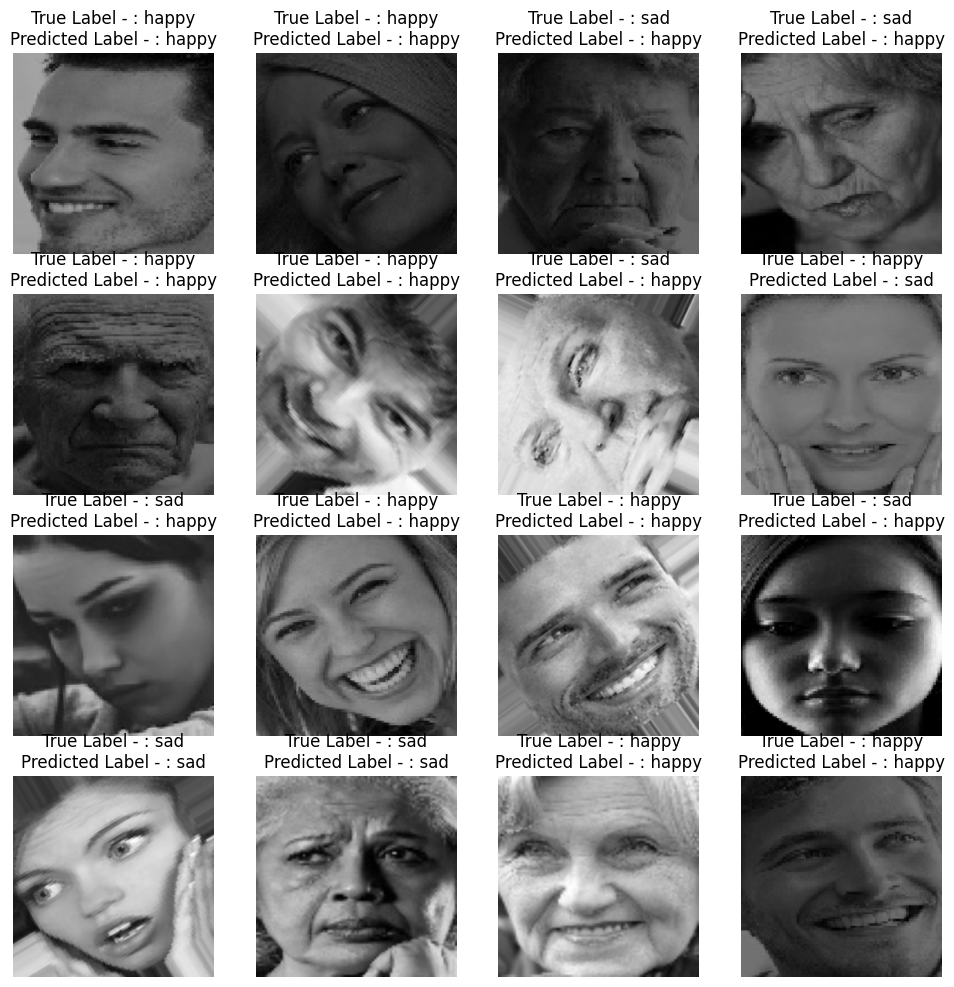

In [65]:
import cv2
import matplotlib.pyplot as plt

# test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# im = tf.constant(test_image, dtype=tf.float32)
# im = tf.expand_dims(im, axis=0)
# print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")

# Cutmix Data Augmentation

In [66]:
def box(lamda):

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, CONFIGURATION["IM_SIZE"])
  r_y = tf.clip_by_value(r_y - r_h//2, 0, CONFIGURATION["IM_SIZE"])

  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, CONFIGURATION["IM_SIZE"])
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, CONFIGURATION["IM_SIZE"])

  r_w = x_b_r - r_x
  if(r_w == 0):
    r_w  = 1

  r_h = y_b_r - r_y
  if(r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [67]:
def cutmix(train_dataset_1, train_dataset_2):
    (image_1,label_1), (image_2, label_2) = train_dataset_1, train_dataset_2
    lamda = tfp.distributions.Beta(2,2)
    lamda = lamda.sample(1)[0]

    r_y, r_x, r_h, r_w = box(lamda)
    crop_2 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
    pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

    crop_1 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
    pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

    image = image_1 - pad_1 + pad_2

    lamda = tf.cast(1- (r_w*r_h)/(CONFIGURATION["IM_SIZE"]*CONFIGURATION["IM_SIZE"]), dtype = tf.float32)
    label = lamda*tf.cast(label_1, dtype = tf.float32) + (1-lamda)*tf.cast(label_2, dtype = tf.float32)

    return image, label

In [68]:
train_dataset_1 = train.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [69]:

# training_dataset = (
#     mixed_dataset
#     .map(cutmix, num_parallel_calls=tf.data.AUTOTUNE)
# #     .prefetch(tf.data.AUTOTUNE)
# )c


In [70]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

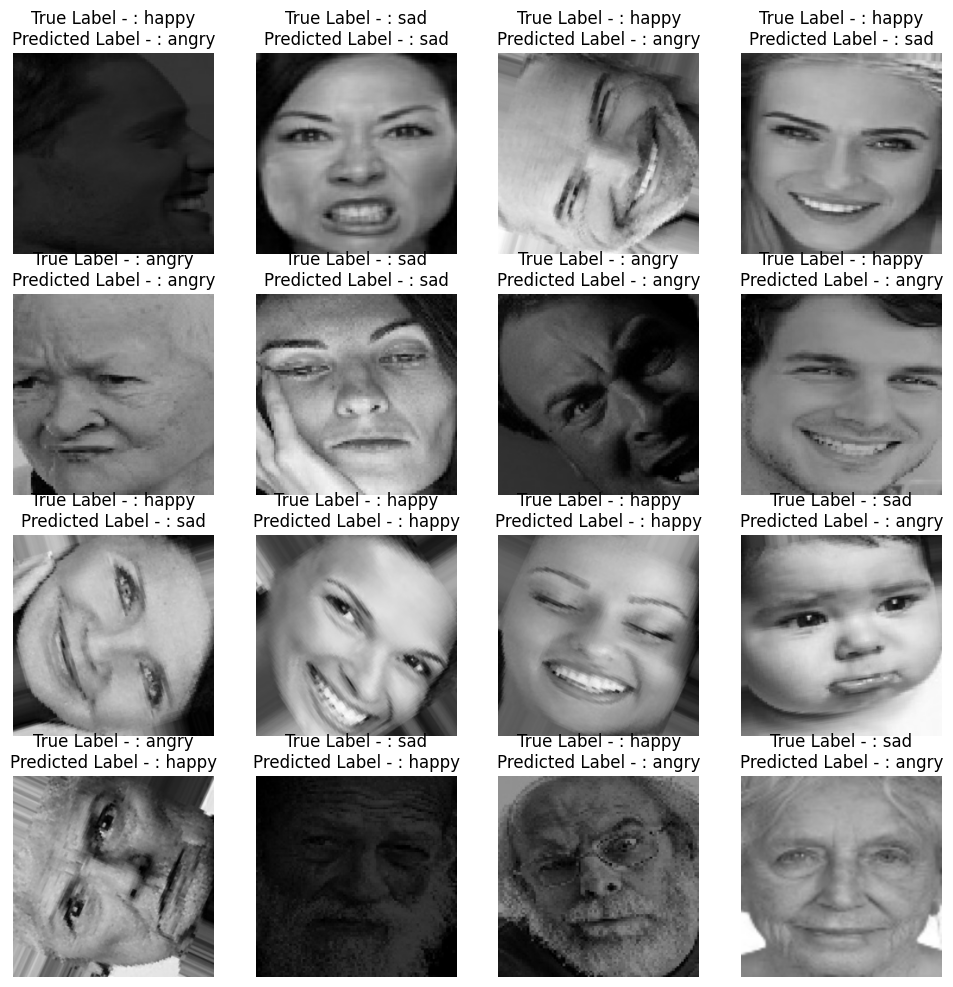

In [71]:
import cv2
import matplotlib.pyplot as plt

# test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# im = tf.constant(test_image, dtype=tf.float32)
# im = tf.expand_dims(im, axis=0)
# print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")

# TFRecords

In [72]:
training_dataset = (
training_dataset
.unbatch()
)


In [73]:
validation_dataset = (
validation_dataset
.unbatch()
)

In [74]:
training_dataset

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None),)>

In [75]:
validation_dataset

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float32, name=None))>

In [76]:
def create_example(image, label):
    bytes_feature = Feature (
        bytes_list=BytesList(value=image))
    int_feature = Feature (
        int64_list=Int64List(value=label))
    example = Example(
        features=Features (feature={
        'images': bytes_feature,
        'labels': int_feature,
}))
    return example.SerializeToString()

In [77]:
NUM_SHARDS=10
PATH='/kaggle/working/shard_{:02d}.tfrecord'

In [78]:
def encode_image(image, label) :
    image = tf. io. encode_peg (image)
    return image, label

In [79]:
def encode_image (image, label):
    image = tf. image.convert_image_dtype(image, dtype=tf.uint8)
    image = tf.io. encode_jpeg (image)
    return image, label

In [80]:
# encoded_dataset = (
#     training_dataset
#     .map(encode_image)
# )

In [81]:
# for shard_number in range(NUM_SHARDS):
#   sharded_dataset = encoded_dataset.shard(NUM_SHARDS, shard_number).as_numpy_iterator()

#   with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
#     for encoded_image, encoded_label in sharded_dataset:
#       example = create_example(encoded_image, encoded_label)
#       file_writer.write(example)


In [82]:
# for shard_number in range(NUM_SHARDS):

#   sharded_dataset = (
#       encoded_dataset
#       .shard(NUM_SHARDS, shard_number)
#       .as_numpy_iterator()
#   )

#   with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
#     for encoded_image, encoded_label in sharded_dataset:

#       example = create_example(encoded_image, encoded_label)
#       file_writer.write(example)

In [83]:
VAL_NUM_SHARDS=3
VAL_PATH='/kaggle/working/val_shard_{:02d}.tfrecord'

In [84]:
encoded_val=(
     validation_dataset
     .map(encode_image)
)

In [85]:

# for shard_number in range(VAL_NUM_SHARDS):
#     sharded_val=(
#         encoded_val
#         .shard(VAL_NUM_SHARDS,shard_number)
#         .as_numpy_iterator()
#    )

#     with tf.io.TFRecordWriter(VAL_PATH.format(shard_number)) as file_writer:
#         for image,label in sharded_val:
#             file_writer.write(create_example(image,label))

In [86]:
recons_dataset = tf.data.TFRecordDataset(
    filenames =[PATH.format(p) for p in range(NUM_SHARDS)] )
recons_val_dataset=tf.data.TFRecordDataset(filenames=[VAL_PATH.format(p) for p in range(VAL_NUM_SHARDS)])

In [87]:
def parse_tfrecords(example):

    feature_description = {
          "images": tf.io.FixedLenFeature([], tf.string),
          "labels": tf.io.FixedLenFeature([], tf.int64),
      }

    example = tf.io.parse_single_example(example, feature_description)
    example["images"] = tf.image.convert_image_dtype(tf.io.decode_jpeg(example["images"],channels=3), dtype=tf.float32)

    return example["images"], example["labels"]


In [88]:

parsed_dataset = (
    recons_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION["BATCH_SIZE"])
    .prefetch(tf.data.AUTOTUNE)
)

In [89]:
val_parsed_dataset= (
    recons_val_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION["BATCH_SIZE"])
    .prefetch(tf.data.AUTOTUNE)
)

In [90]:
# plt.figure(figsize=(12,12))
# for images,labels in val_parsed_dataset.take(1):
#     for i in range(16):
#         ax=plt.subplot(4,4,i+1)
#         plt.imshow(images[i])
#         plt.title(CLASS_NAMES[(labels[i])])
#         plt.axis('off')

In [91]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
])

In [92]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3) ),

    resize_rescale_layers,

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [93]:
loss_function=tf.keras.losses.SparseCategoricalCrossentropy()
metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
lenet_model.compile(
                    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                    loss=loss_function,
                    metrics=metrics
                                    )

In [94]:

# history= lenet_model.fit(
     #parsed_dataset,
    # validation_data=val_parsed_dataset,
     #epochs=CONFIGURATION['N_EPOCHS'],
    # verbose=1)

In [95]:
# import cv2
# import matplotlib.pyplot as plt

# # test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# # im = tf.constant(test_image, dtype=tf.float32)
# # im = tf.expand_dims(im, axis=0)
# # print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

# plt.figure(figsize=(12, 12))

# for images, labels in validation_dataset.take(1):
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i] / 255.)

#         plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
#                   "\n" + "Predicted Label - : " +
#                   CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
#         plt.axis("off")

# Custom Conv2D

In [96]:
class CustomConv2D(Layer):
  def __init__(self, n_filters, kernel_size, n_strides, padding = 'valid'):
    super(CustomConv2D, self).__init__(name = 'custom_conv2d')

    self.conv = Conv2D(
        filters = n_filters,
        kernel_size = kernel_size,
        activation = 'relu',
        strides = n_strides,
        padding = padding)

    self.batch_norm = BatchNormalization()

  def call(self, x, training = True):

    x = self.conv(x)
    x = self.batch_norm(x, training)

    return x

# Residual Block

In [97]:
class ResidualBlock(Layer):
  def __init__(self, n_channels, n_strides = 1):
    super(ResidualBlock, self).__init__(name = 'res_block')

    self.dotted = (n_strides != 1)

    self.custom_conv_1 = CustomConv2D(n_channels, 3, n_strides, padding = "same")
    self.custom_conv_2 = CustomConv2D(n_channels, 3, 1, padding = "same")

    self.activation = Activation('relu')

    if self.dotted:
      self.custom_conv_3 = CustomConv2D(n_channels, 1, n_strides)

  def call(self, input, training=True):

    x = self.custom_conv_1(input, training)
    x = self.custom_conv_2(x, training)

    if self.dotted:
      x_add = self.custom_conv_3(input, training)
      x_add = Add()([x, x_add])
    else:
      x_add = Add()([x, input])

    return self.activation(x_add)

# Complete Network

In [98]:
class ResNet34(tf.keras.Model):
    def __init__(self):
        super(ResNet34, self).__init__(name='resnet_34')

        self.conv_1 = CustomConv2D(64, 7, 2, padding='same')
        self.max_pool = tf.keras.layers.MaxPooling2D(3, 2)

        self.conv_2_1 = ResidualBlock(64)
        self.conv_2_2 = ResidualBlock(64)
        self.conv_2_3 = ResidualBlock(64)

        self.conv_3_1 = ResidualBlock(128, 2)
        self.conv_3_2 = ResidualBlock(128)
        self.conv_3_3 = ResidualBlock(128)
        self.conv_3_4 = ResidualBlock(128)

        self.conv_4_1 = ResidualBlock(256, 2)
        self.conv_4_2 = ResidualBlock(256)
        self.conv_4_3 = ResidualBlock(256)
        self.conv_4_4 = ResidualBlock(256)
        self.conv_4_5 = ResidualBlock(256)
        self.conv_4_6 = ResidualBlock(256)

        self.conv_5_1 = ResidualBlock(512, 2)
        self.conv_5_2 = ResidualBlock(512)
        self.conv_5_3 = ResidualBlock(512)

        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()

        self.fc_3 = tf.keras.layers.Dense(CONFIGURATION["NUM_CLASSES"], activation='softmax')

    def call(self, x, training=True):
        x = self.conv_1(x, training=training)
        x = self.max_pool(x)

        x = self.conv_2_1(x, training=training)
        x = self.conv_2_2(x, training=training)
        x = self.conv_2_3(x, training=training)

        x = self.conv_3_1(x, training=training)
        x = self.conv_3_2(x, training=training)
        x = self.conv_3_3(x, training=training)
        x = self.conv_3_4(x, training=training)

        x = self.conv_4_1(x, training=training)
        x = self.conv_4_2(x, training=training)
        x = self.conv_4_3(x, training=training)
        x = self.conv_4_4(x, training=training)
        x = self.conv_4_5(x, training=training)
        x = self.conv_4_6(x, training=training)

        x = self.conv_5_1(x, training=training)
        x = self.conv_5_2(x, training=training)
        x = self.conv_5_3(x, training=training)

        x = self.global_pool(x)

        return self.fc_3(x)


In [99]:
# checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
#         '/kaggle/working/',
#         monitor='val_accuracy',
#         mode='max',
#         verbose=1,
#         save_best_only=True
# )

In [100]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [101]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]

In [102]:
#resnet_34.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                #    loss=loss_function,
                #    metrics=metrics
                #                    )

In [103]:
#history=resnet_34.fit(train,validation_data=val, epochs=CONFIGURATION['N_EPOCHS'],verbose=1)

# Transfer Learning EfficientNetB4

In [104]:
backbone = tf.keras.applications.efficientnet.EfficientNetB4(
    include_top = False,
    weights='imagenet',
    input_shape=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"], 3),
    )

In [105]:
backbone.trainable = False

In [106]:
pretrained_model = tf.keras.Sequential([
    Input(shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"],3)),
    backbone,
    GlobalAveragePooling2D(),
    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu"),
    BatchNormalization(),
    Dense( CONFIGURATION["N_DENSE_2"], activation = "relu"),
    Dense( CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

    ])
pretrained_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 8, 8, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1024)           │     1,836,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,645,538 (74.94 MB)

 Trainable params: 1,969,667 (7.51 MB)

 Non-trainable params: 17,675,871 (67.43 MB)

In [107]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [108]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [109]:
#pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
#                   loss=loss_function,
#                    metrics=metrics
#                                    )

In [110]:
# pretrained_model.fit(
#         train,
#         validation_data=val,
#         epochs=CONFIGURATION['N_EPOCHS'],
#         verbose=1
# )

# ViT model from scratch

In [111]:
import os

# Define the correct path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/'

# Check if the directory exists and list the files
if os.path.exists(dataset_path):
    files = os.listdir(dataset_path)
    print(files)
else:
    print("Dataset path does not exist.")



['EmotionsDataset_Splitted', 'Emotions Dataset', 'EmotionsDataset']


In [112]:
test_image=cv2.imread(r'/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')
test_image=cv2.resize(test_image,(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']))

In [113]:
from keras.saving import register_keras_serializable
from tensorflow.keras.layers import Layer, Dense, Embedding
import tensorflow as tf

@register_keras_serializable()
class PatchEncoder(Layer):
    def __init__(self, N_PATCHES, HIDDEN_SIZE, **kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.N_PATCHES = N_PATCHES
        self.HIDDEN_SIZE = HIDDEN_SIZE
        self.conv = tf.keras.layers.Conv2D(filters=HIDDEN_SIZE, kernel_size=16, strides=16, padding='valid')
        self.positional_embedding = Embedding(N_PATCHES, HIDDEN_SIZE)

    def call(self, x):
        # Apply Conv2D as patch extractor
        x = self.conv(x)  # [batch_size, 16, 16, HIDDEN_SIZE]
        batch_size = tf.shape(x)[0]
        patches = tf.reshape(x, (batch_size, -1, self.HIDDEN_SIZE))  # [batch_size, N_PATCHES, HIDDEN_SIZE]

        # Add positional embedding
        positions = tf.range(start=0, limit=self.N_PATCHES, delta=1)
        x = patches + self.positional_embedding(positions)
        return x

    def get_config(self):
        config = super().get_config()
        config.update({
            "N_PATCHES": self.N_PATCHES,
            "HIDDEN_SIZE": self.HIDDEN_SIZE
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [114]:
from keras.saving import register_keras_serializable
from tensorflow.keras.layers import Layer, LayerNormalization, MultiHeadAttention, Dense, Add

@register_keras_serializable()
class TransformerEncoder(Layer):
    def __init__(self, N_HEADS, HIDDEN_SIZE, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.N_HEADS = N_HEADS
        self.HIDDEN_SIZE = HIDDEN_SIZE

        self.layer_norm_1 = LayerNormalization()
        self.layer_norm_2 = LayerNormalization()
        self.multi_head_attention = MultiHeadAttention(N_HEADS, HIDDEN_SIZE)
        self.dense_1 = Dense(HIDDEN_SIZE, activation=tf.nn.gelu)
        self.dense_2 = Dense(HIDDEN_SIZE, activation=tf.nn.gelu)

    def call(self, input):
        x_1 = self.layer_norm_1(input)
        x_1 = self.multi_head_attention(x_1, x_1)
        x_1 = Add()([x_1, input])

        x_2 = self.layer_norm_2(x_1)
        x_2 = self.dense_1(x_2)
        output = self.dense_2(x_2)
        output = Add()([output, x_1])
        return output

    def get_config(self):
        config = super(TransformerEncoder, self).get_config()
        config.update({
            "N_HEADS": self.N_HEADS,
            "HIDDEN_SIZE": self.HIDDEN_SIZE,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [115]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten
from keras.saving import register_keras_serializable



CONFIGURATION = {
    'NUM_CLASSES': 3,
    'CLASS_NAMES': ['angry', 'happy', 'sad']
}

@register_keras_serializable()
class ViT(Model):
    def __init__(self, N_HEADS, HIDDEN_SIZE, N_PATCHES, N_LAYERS, N_DENSE_UNITS, **kwargs):
        super(ViT, self).__init__(**kwargs)
        self.N_HEADS = N_HEADS
        self.HIDDEN_SIZE = HIDDEN_SIZE
        self.N_PATCHES = N_PATCHES
        self.N_LAYERS = N_LAYERS
        self.N_DENSE_UNITS = N_DENSE_UNITS

        self.patch_encoder = PatchEncoder(N_PATCHES, HIDDEN_SIZE)
        self.trans_encoder = [TransformerEncoder(N_HEADS, HIDDEN_SIZE) for _ in range(N_LAYERS)]
        self.dense_1 = Dense(N_DENSE_UNITS, activation=tf.nn.gelu)
        self.dense_2 = Dense(N_DENSE_UNITS, activation=tf.nn.gelu)
        self.dense_3 = Dense(CONFIGURATION['NUM_CLASSES'], activation='softmax')

    def call(self, inputs):
        x = self.patch_encoder(inputs)
        for layer in self.trans_encoder:
            x = layer(x)
        x = Flatten()(x)
        x = self.dense_1(x)
        x = self.dense_2(x)
        return self.dense_3(x)

    def get_config(self):
        config = super(ViT, self).get_config()
        config.update({
            "N_HEADS": self.N_HEADS,
            "HIDDEN_SIZE": self.HIDDEN_SIZE,
            "N_PATCHES": self.N_PATCHES,
            "N_LAYERS": self.N_LAYERS,
            "N_DENSE_UNITS": self.N_DENSE_UNITS,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)



In [116]:
vit = ViT(
    N_HEADS=4,
    HIDDEN_SIZE=768,
    N_PATCHES=256,
    N_LAYERS=2,
    N_DENSE_UNITS=128
)


vit(tf.zeros([1, 256, 256, 3]))


model = vit


model.summary()


Model: "vi_t"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ patch_encoder (PatchEncoder)    │ ?                      │       787,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ ?                      │    10,631,424 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_1           │ ?                      │    10,631,424 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (1, 128)               │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (1, 128)               │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (1, 3)                 │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,232,899 (180.18 MB)

 Trainable params: 47,232,899 (180.18 MB)

 Non-trainable params: 0 (0.00 B)

# HuggingFace ViT

In [117]:
resize_rescale_hf=tf.keras.Sequential([
        Resizing(224,224),
        Rescaling(1./255),
        Permute((3,1,2))
])

In [124]:
 from transformers import TFViTModel,ViTFeatureExtractor

 base_model=TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

 inputs=Input(shape=(256,256,3))
 x=resize_rescale_hf(inputs)
 x=base_model(x)[0][:,0,:]

 output=Dense(CONFIGURATION['NUM_CLASSES'],activation='softmax')(x)
 model=tf.keras.Model(inputs=inputs,outputs=output)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


ValueError: Exception encountered when calling layer 'tf_vi_t_model' (type TFViTModel).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for pixel_values.

Call arguments received by layer 'tf_vi_t_model' (type TFViTModel):
  • pixel_values=<KerasTensor shape=(None, 3, 224, 224), dtype=float32, sparse=False, name=keras_tensor_583>
  • head_mask=None
  • output_attentions=None
  • output_hidden_states=None
  • interpolate_pos_encoding=None
  • return_dict=None
  • training=False

In [ ]:
model.summary()

In [120]:
loss_function=tf.keras.losses.CategoricalCrossentropy()
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [121]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),loss=loss_function,metrics=metrics)

In [123]:
model.fit(train,validation_data=val,epochs=10,verbose=1)

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 105s 494ms/step - accuracy: 0.6636 - loss: 0.7902 - top_k_accurcay: 0.8832 - val_accuracy: 0.5966 - val_loss: 0.9487 - val_top_k_accurcay: 0.8525
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 105s 495ms/step - accuracy: 0.6952 - loss: 0.7266 - top_k_accurcay: 0.9034 - val_accuracy: 0.5347 - val_loss: 1.0484 - val_top_k_accurcay: 0.8033
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 111s 522ms/step - accuracy: 0.5556 - loss: 1.5075 - top_k_accurcay: 0.8070 - val_accuracy: 0.5443 - val_loss: 1.2232 - val_top_k_accurcay: 0.8248
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 137s 498ms/step - accuracy: 0.6277 - loss: 1.1140 - top_k_accurcay: 0.8628 - val_accuracy: 0.6185 - val_loss: 0.9343 - val_top_k_accurcay: 0.8573
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 106s 496ms/step - accuracy: 0.7162 - loss: 0.6755 - top_k_accurcay: 0.9165 - val_accuracy: 0.5825 - val_loss: 1.0117 - val_top_k_accurcay: 0.8314
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 148s 527ms/step - accuracy: 0.

## Using WandB with ViT

In [ ]:
!pip install wandb
import wandb
from wandb.integration.keras import WandbCallback
from tensorflow.keras.callbacks import Callback

In [ ]:
wandb.login()

In [ ]:
wandb.init(project='Emotion-Detection')

In [ ]:
wandb.config={"BATCH_SIZE": 32,
   "IM_SIZE": 256,
   "LEARNING_RATE": 5e-5,
   "N_EPOCHS": 20,
   "DROPOUT_RATE": 0.0,
  "REGULARIZATION_RATE": 0.0,
   "N_FILTERS": 6,
   "KERNEL_SIZE": 3,
   "N_STRIDES": 1,
   "POOL_SIZE": 2,
   "N_DENSE_1": 1024,
  "N_DENSE_2": 128,
   "NUM_CLASSES": 3,
   "PATCH_SIZE": 16,
   "PROJ_DIM": 768,
   "CLASS_NAMES": ["angry", "happy", "sad"],
            }

In [ ]:
model =vit
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),loss=loss_function,metrics=metrics)

In [ ]:
import wandb
from wandb.integration.keras import WandbMetricsLogger

model = vit
history = model.fit(
   train,
   validation_data=val,
   epochs=3,
   verbose=1,
   callbacks=[
       WandbMetricsLogger(log_freq='epoch')
   ]
)

In [ ]:
import numpy as np
import wandb
from tensorflow.keras.callbacks import Callback

class LogConfMatrix(Callback):
    def on_epoch_end(self, epoch, logs=None):
        predicted = []
        labels = []

        for im, label in val:
            preds = model(im, training=False)
            predicted.append(preds.numpy())
            labels.append(label.numpy())

        pred = np.concatenate([np.argmax(p, axis=-1) for p in predicted])
        lab = np.concatenate([np.argmax(l, axis=-1) for l in labels])

        cm = wandb.plot.confusion_matrix(
            y_true=lab,
            preds=pred,
            class_names=CONFIGURATION['CLASS_NAMES']
        )
        wandb.log({"confusion_matrix": cm})


In [ ]:
class LogResultsTable(Callback):
   def on_epoch_end(self,epoch,logs):
       columns=['Image','Predicted','Label']

       val_table=wandb.Table(columns=columns)
       for im,label in val.take(100):

           pred=CONFIGURATION['CLASS_NAMES'][tf.argmax(model(im),axis=-1).numpy()[0]]
           lab=CONFIGURATION['CLASS_NAMES'][tf.argmax(label,axis=-1).numpy()[0]]
           row=[wandb.Image(im),pred,lab]

           val_table.add_data(*row)

       wandb.log({'Model Results':val_table})


In [ ]:
history = model.fit(
    train,
    validation_data=val,
    epochs=3,
    verbose=1,
    callbacks=[
        WandbCallback(log_model=False, save_model=False),
        LogConfMatrix(),
        LogResultsTable()
    ]
)

In [ ]:
model.save_weights("vit.weights.h5")
model.save('vit_finetuned.keras')
model.save('vit_finetuned.h5')

In [ ]:
from keras.models import load_model
model = load_model('vit_finetuned.keras', custom_objects={'ViT': ViT, 'PatchEncoder': PatchEncoder, 'TransformerEncoder': TransformerEncoder})

In [ ]:
import os

save_dir = "/content/drive/MyDrive/vit_models"
os.makedirs(save_dir, exist_ok=True)

In [ ]:
model.save(f"{save_dir}/vit_finetuned.keras")
model.save_weights(f"{save_dir}/vit.weights.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tf2onnx
import tensorflow as tf

model = load_model(
    "/content/drive/MyDrive/vit_models/vit_finetuned.keras",
    custom_objects={'ViT': ViT, 'PatchEncoder': PatchEncoder, 'TransformerEncoder': TransformerEncoder}
)


In [ ]:
import tensorflow as tf
import tf2onnx

# Properly wrap your custom ViT model
inputs = tf.keras.Input(shape=(256, 256, 3), name="input")
outputs = model(inputs)  # use your custom model here
wrapped_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Define input signature for ONNX export
spec = (tf.TensorSpec((None, 256, 256, 3), tf.float32, name="input"),)

# Export the wrapped model
onnx_model, _ = tf2onnx.convert.from_keras(
    wrapped_model,
    input_signature=spec,
    opset=13,
    output_path="vit_finetuned.onnx"
)

print("ONNX model exported as vit_finetuned.onnx")


In [ ]:
!pip install tensorflow==2.18.0 --quiet

Exporting to ONNX format

In [ ]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)


Deployment

In [ ]:
!pip install  tf2onnx
!pip install onnxruntime
!pip install onnxruntime-gpu
import onnxruntime as rt

In [ ]:
rt.get_device

In [ ]:
# # #conversion
#!python -m tf2onnx.convert --saved-model vit_finetuned/ --output vit_onnx.onnx

In [ ]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
}
output_names = ['dense']

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tf2onnx

# Define input shape based on your model's expected input
inputs = keras.Input(shape=(256, 256, 3), name="input")

# Wrap your loaded ViT model with an explicit Functional model
outputs = model(inputs)
wrapped_model = keras.Model(inputs=inputs, outputs=outputs)

# Convert to ONNX
spec = (tf.TensorSpec((None, 256, 256, 3), tf.float32, name="input"),)
output_path = "vit_finetuned.onnx"

model_proto, _ = tf2onnx.convert.from_keras(
    wrapped_model,
    input_signature=spec,
    opset=13,
    output_path=output_path
)

output_names = [n.name for n in model_proto.graph.output]
print("Output names:", output_names)


In [ ]:
test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')
im = test_image.astype(np.float32)
im = np.expand_dims(test_image, axis=0)

In [ ]:
def accuracy(model):
  total, acc = 0.0
  for im, label in validation_dataset.take(100):
    onxx_pred = model.run(output_names, {"input": np.array(im)})

    if(int(np.argmax(onnx_pred, axis = -1)[0][0])==int(np.argmax(label,axis = -1)))
      acc += 1
    total += 1
  return acc/total

In [ ]:
import time
providers = ['CUDAExecutionProvider']
m = rt.InferenceSession('/content/vit_quantised.onnx', providers = providers)
t1 = time.time()
N_PREDICTIONS = 100
for _ in range(100):
  onnx_pred = m.run(output_names, {"input":im})
print((time.time() - t1)/N_PREDICTIONS)

In [ ]:
rt.get_device()

In [ ]:
print(onnx_pred)

In [ ]:
t1 = time.time()
for _ in range(N_PREDICTIONS):
  model(im)
print(time.time() - t1)

Quantisation

In [ ]:
import onnx
from onnxruntime.quantisation import quantize_dynamic, QuantType

In [ ]:
model_fp32 = '/conten/drive/MyDrive?Bang/vit_keras.onnx'
model_quant = '/content/model_quantized.onnx'

quantized_model = quantize_dynamic(model_fp32, model_quant, weight_type = QuantType.QUInt8)

In [ ]:
!pip install -q tensorflow-model-optimization

In [ ]:
import tensorflow_model_optimization as tmfot

In [ ]:
Input(shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"],3)),
backbone,
x=GlobalAveragePooling2D()(backbone.output),
x = Dense(CONFIGURATION["N_DENSE_1"], ACTIVATION = "relu")(x),
x = BatchNormalization()(x),
x = Dense(CONFIGURATION["N_DENSE_2"],activation = "relu")(x),
output = Dense(CONFIGURATION['NUM_CLASSES'], ACTIVATION ='softmax')(x),

pretrained_func_model = tf.keras.Model(inputs = backbone.input, outputs = output)

pretrained_model.summary()


In [ ]:
pretrained_model.summary()

In [ ]:
quant_aware_hf = tfmot.quantization.keras.quantize_model(pretrained_model)

In [ ]:
pretrained_model = tf.keras.Sequential([
    Input(shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"],3)),
    backbone,
    GlobalAveragePooling2D(),
    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu"),
    BatchNormalization(),
    Dense( CONFIGURATION["N_DENSE_2"], activation = "relu"),
    Dense( CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

    ])
pretrained_func_model.summary()

In [ ]:
#quant_aware_hf = tfmot.quantization.keras.quantize_model(lenet_model)

In [ ]:
def apply_quantization_to_conv(layer):
  if "conv" in layer.name:
    return tfmot.quantization.keras.quantize_annote_layer(layer)
  return layer

In [ ]:
quant_aware_eff = tf.keras.models.clone_model(
    pretrained_func_model,clone_function = apply_quantization_to_conv
    )

In [ ]:
quant_aware_eff.summary()

In [ ]:
quant_aware_model = tfmot.quantization.keras.quantize_apply(quant_aware_eff)
quant_aware_model.summary()

In [ ]:
pretrained_model.load_weights('content/drive/MyDrive/Bang/eff_keras.h5')

In [ ]:
pretrained_model.evaluate(validation_dataset)

In [ ]:
def representative_data_gen() :
   for input_value,j in training_dataset.take(20):
     yield[input_value]

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations= [tf.lite.Optimize.DEFAULTS]
converter.inference_input_type = tf.uint8
converter.inference_input_type= tf.uint8
converter.representative_dataset = representative_data_gen

In [ ]:
tflite_model = converter.convert()

In [ ]:
import pathlib

tflite_models_dir = pathlib.Path('/content/quantized_models/')
tflite_models_dir.mkdir(exist_ok = True, parents=True)
tflite_model_file = tflite_models_dir"/eff_model.tflite"
tflite_model_file.write_bytes(tflite_model)

In [ ]:
pretrained_model.save("eff_model.h5")

In [ ]:
!pip3 install --extra-index-url https://google-coral.github.io/py-repo/tflite_runtime

In [ ]:
import tflite_runtime.interpreter as tflite
import numpy as np
import cv2

In [ ]:
test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')
im = test_image.astype(np.float32)
im = np.expand_dims(test_image, axis=0)

In [ ]:
tf.zeros([1,2])

In [ ]:
interpreter = tf.liteInterpreter(model_path = "/content/drive/MyDrive/Bang/eff_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = intepreter.get_output_detials()[0]
print(input_details["dtype"])

# test_image = im.numpy().astype(input_details["dtype"])
# interpreter.set_tensor(input_details["index"], test_image)

# interpreter.invoke()

# output = interpreter.get_tensor(output_details['index'])[0]